Welcome to DS5100 Final Project package
initialized:
weight changed:
die created:
this is the created die:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
show die state with method call:
show die state2:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
rolled die:
results:    0
0  4
1  2
2  2
3  1
4  4
5  3
6  4
7  4
8  4
9  5


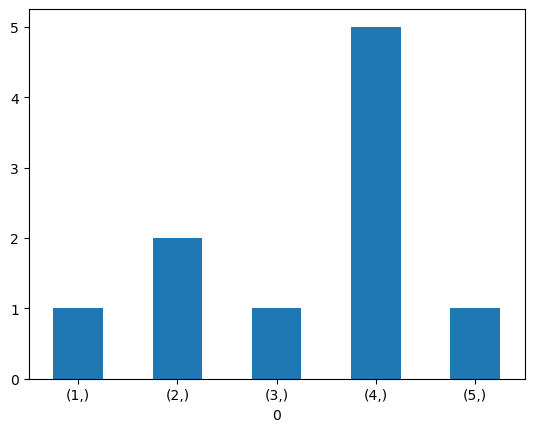

In [1]:
import numpy as np
import pandas as pd
import unittest
import finalproject
from die import Die
#from game import Game

In [2]:
# Scenario 1: A 2-headed Coin

# Task 1. Create a fair coin (with faces H and T) 
# and one unfair coin in which one of the faces has a weight of 5
# and the others 1

faces1 = np.arange (2)  # creates array
faces_df1 = Die(faces1)
print ('initialized:')
faces_df1.change_weight (1, 5)
print ('weight changed:')
die1 = faces_df1.create_die (faces_df1)
print ('this is the created die1:', die1)

faces2 = np.arange (2)  # creates array
faces_df2 = Die(faces2)
print ('initialized:')
faces_df2.change_weight (1, 1)
die2 = faces_df1.create_die (faces_df2)
print ('this is the created die2:', die2)


initialized:
weight changed:
this is the created die1:    side   weights
0     1  0.833333
1     2  0.166667
initialized:
this is the created die2:    side   weights
0     1  0.833333
1     2  0.166667


In [12]:
# Scenario 1: A 2-headed Coin

# Task 2. Play a game of 1000 flips with two fair dice.




In [ ]:
# Scenario 1: A 2-headed Coin

# Task 3. Play another game (using a new Game object) of 1000 flips, 
# this time using two unfair dice and one fair die. 
# For the second unfair die, you can use the same die object twice in the list
# of dice you pass to the Game object.




In [ ]:
# Scenario 1: A 2-headed Coin

# Task 4. For each game, use an Analyzer object to determine 
# the raw frequency of jackpots — i.e. getting either all Hs or all Ts.




In [ ]:
# Scenario 1: A 2-headed Coin

# Task 5. For each analyzer, compute relative frequency 
# as the number of jackpots over the total number of rolls.




In [ ]:
# Scenario 1: A 2-headed Coin

# Task 6. Show your results, comparing the two relative frequencies,
# in a simple bar chart.




In [ ]:
# Scenario 2: A 6-sided Die

# Task 1. Create three dice, each with six sides 
# having the faces 1 through 6.



In [ ]:
# Scenario 2: A 6-sided Die
 
# Task 2. Convert one of the dice to an unfair one by 
# weighting the face 6 five times more than the other weights 
# (i.e. it has weight of 5 and the others a weight of 1 each).



In [ ]:
# Scenario 2: A 6-sided Die

# Task 3. Convert another of the dice to be unfair by 
# weighting the face 1 five times more than the others.



In [ ]:
# Scenario 2: A 6-sided Die

# Task 4. Play a game of 10000 rolls with 5 fair dice.



In [ ]:
# Scenario 2: A 6-sided Die

# Task 5. Play another game of 10000 rolls, this time with 2 unfair dice,
# one as defined in steps #2 and #3 respectively, and 3 fair dice.
    


In [ ]:
# Scenario 2: A 6-sided Die

# Task 5. Play another game of 10000 rolls, this time with 2 unfair dice,
# one as defined in steps #2 and #3 respectively, and 3 fair dice.
    


In [ ]:
# Scenario 2: A 6-sided Die

# Task 6. For each game, use an Analyzer object to 
# determine the relative frequency of jackpots and 
# show your results, comparing the two relative frequencies,
# in a simple bar chart.


In [ ]:
# Scenario 3: Letters of the Alphabet (7)

# Task 1. Create a "die" of letters from A to Z with
# weights based on their frequency of usage 
# as found in the data file english_letters.txt. 
# Use the frequencies (i.e. raw counts) as weights.



In [ ]:
# Scenario 3: Letters of the Alphabet (7)
 
# Task 2. Play a game involving 4 of these dice with 1000 rolls.



In [ ]:
# Scenario 3: Letters of the Alphabet (7)

# Task 3. Determine how many permutations in your results
# are actual English words, based on the vocabulary found
# in scrabble_words.txt.



In [ ]:
# Scenario 3: Letters of the Alphabet (7)
 
# Task 4. Repeat steps #2 and #3, this time with 5 dice. 
# How many actual words does this produce? 
# Which produces more?
